In [ ]:
Q1.

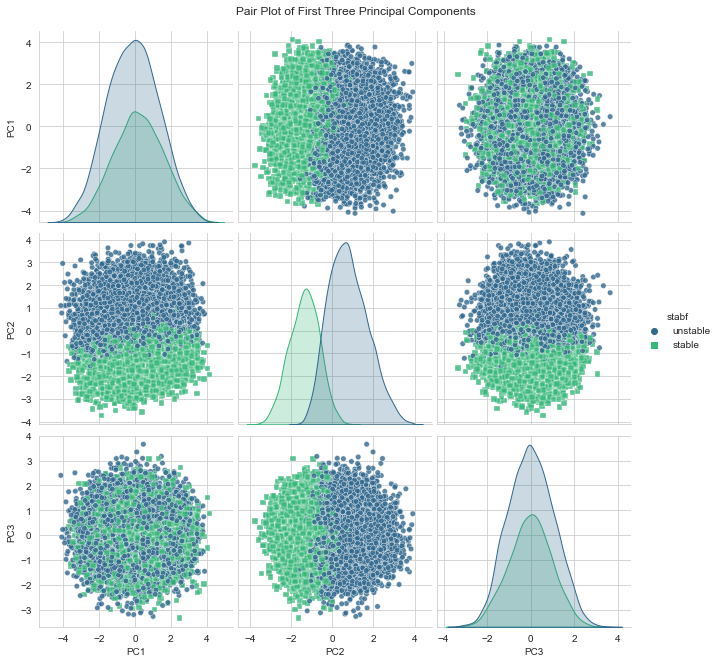

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = pd.read_csv('Data_for_UCI.csv')

features = data.drop("stabf", axis=1)
target = data["stabf"]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca_standardized = PCA(n_components=3)
principal_components_standardized = pca_standardized.fit_transform(features_scaled)

pc_standardized_df = pd.DataFrame(data=principal_components_standardized, columns=['PC1', 'PC2', 'PC3'])
pc_standardized_df['stabf'] = target

sns.set_style("whitegrid")
pair_plot_standardized = sns.pairplot(pc_standardized_df, hue='stabf', palette='viridis', markers=["o", "s"],
                                      diag_kind="kde", height=3, plot_kws={"s": 30, "alpha": 0.8})

pair_plot_standardized.fig.suptitle("Pair Plot of First Three Principal Components", y=1.02)

plt.show()


In [3]:
Q2.

SyntaxError: invalid syntax (<ipython-input-3-ebd2e37906a1>, line 1)

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


data = pd.read_csv('Data_for_UCI.csv')
features = data.drop("stabf", axis=1)
target = data["stabf"]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
svm_poly = SVC(kernel='poly', degree=3, C=1)

svm_poly.fit(X_train, y_train)

y_pred = svm_poly.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

results = {
    'Model Hyperparameters': {
        'Kernel': 'Polynomial',
        'Degree': 3,
        'Regularization Parameter (C)': 1
    },
    'Performance Metrics': {
        'Accuracy': accuracy,
        'Classification Report': classification_rep,
        'Confusion Matrix': confusion_mat.tolist()
    }
}

print(results)


{'Model Hyperparameters': {'Kernel': 'Polynomial', 'Degree': 3, 'Regularization Parameter (C)': 1}, 'Performance Metrics': {'Accuracy': 0.973, 'Classification Report': '              precision    recall  f1-score   support\n\n      stable       0.97      0.95      0.96       693\n    unstable       0.97      0.99      0.98      1307\n\n    accuracy                           0.97      2000\n   macro avg       0.97      0.97      0.97      2000\nweighted avg       0.97      0.97      0.97      2000\n', 'Confusion Matrix': [[657, 36], [18, 1289]]}}
